#This is the main ipynb notebook
based on the py files in /../src_class

# Notes to myself:


# Imports
from `__init__.py`

In [1]:
from google.colab import files, drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import importlib
import os
import sys

parent_dir = "/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class"
sys.path.append(parent_dir)

import utils
import Cell_Class
import TDL_Class
import UniqueHistory_Class
import read_and_print
import initialize
import ITI


## Reloads

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>

# POR 0 - Initialize the TDL slices

In [3]:
TDL1_Z3_3 = TDL_Class.TDL()
TDL1_Z3_3.initialize_TDL(0,1600,3)

[  16   17   18   19   20   21   22   23   40   41   42   43   44   45
   46   47   64   65   66   67   68   69   70   71   88   89   90   91
   92   93   94   95  112  113  114  115  116  117  118  119  136  137
  138  139  140  141  142  143  160  161  162  163  164  165  166  167
  184  185  186  187  188  189  190  191  208  209  210  211  212  213
  214  215  232  233  234  235  236  237  238  239  256  257  258  259
  260  261  262  263  280  281  282  283  284  285  286  287  304  305
  306  307  308  309  310  311  328  329  330  331  332  333  334  335
  352  353  354  355  356  357  358  359  376  377  378  379  380  381
  382  383  400  401  402  403  404  405  406  407  424  425  426  427
  428  429  430  431  448  449  450  451  452  453  454  455  472  473
  474  475  476  477  478  479  496  497  498  499  500  501  502  503
  520  521  522  523  524  525  526  527  544  545  546  547  548  549
  550  551  568  569  570  571  572  573  574  575  592  593  594  595
  596 

#POR 1

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250421/Unsync1_Ch1_Z3_3_POR1.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250421/Unsync1_Ch1_Z3_3_POR1.csv'.

There are 197 tapped bins and 190 untapped = 387 = 387

Tapped is: 50.90% 



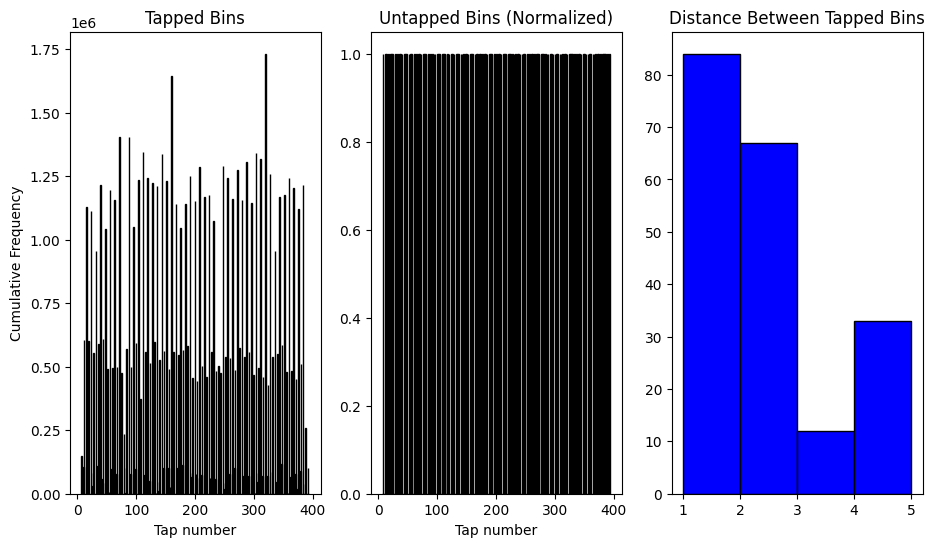

In [4]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250421/Unsync1_Ch1_Z3_3_POR1.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps1, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps1)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps1)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps1) / len(full_range):.2f}% \n")

# Print Taps
bin1, freq1 = read_and_print.print_taps(data, present_taps1, missing_taps)

## 2) Carry out the POR & error lib construction

In [5]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps1} \n")


# Feed to the TDL
TDL1_Z3_3.feed_physical_nums(present_taps1, 1, verbose = True)


# POR
TDL1_Z3_3.perform_POR()
to_print1 = TDL1_Z3_3.get_logical_assignments()
error_lib1 = TDL1_Z3_3.build_initial_error_lib()


Present taps: 
 [  7   9  10  11  15  18  19  23  25  26  27  31  33  34  35  39  41  42
  43  47  49  50  51  53  55  57  58  59  63  66  67  71  73  74  75  79
  81  82  83  87  90  91  93  95  97  98  99 103 105 106 107 111 114 115
 119 121 122 123 127 129 130 131 133 135 137 138 139 141 143 145 146 147
 151 153 154 155 157 159 161 162 163 165 167 169 170 171 175 178 179 181
 183 185 186 187 191 193 194 195 199 201 202 203 207 209 210 211 215 217
 218 219 223 225 226 227 229 231 234 235 239 241 242 243 245 247 249 250
 251 255 257 258 259 263 266 267 271 273 274 275 279 282 283 285 287 289
 290 291 295 297 298 299 301 303 305 306 307 309 311 314 315 319 321 322
 323 327 330 331 335 337 338 339 343 345 346 347 351 353 354 355 357 359
 361 362 363 365 367 369 370 371 373 375 378 379 383 386 387 391 393] 

Trial 0 data processed and added to unique history. 


--------------------------------------------------------------------------------------------------------
🟡 Running 'get_logical

##3) Results

In [6]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_3.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_3.logical_assignment}")
print(f"{to_print1}")

POR result: 

((np.int64(8),),):[8]
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 7, 5]
((np.int64(3), np.int64(4), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 7, 5]
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 1, np.int64(3), 8, 4, 6, 5, 7]
((np.int64(3), np.int64(4), np.int64(6), np.int64(8)),):[2, 3, 1, 8, np.int64(4), 6, 5, 7]
((np.int64(2),),):[2, 1, 8, 4, 6, 5, 7, np.int64(3)]

Logical bin assignment: 

{0: np.int64(16), 1: np.int64(17), 2: np.int64(18), 3: np.int64(19), 4: np.int64(20), 5: np.int64(21), 6: np.int64(22), 7: np.int64(23), 8: np.int64(40), 9: np.int64(41), 10: np.int64(42), 11: np.int64(43), 12: np.int64(44), 13: np.int64(45), 14: np.int64(46), 15: np.int64(47), 16: np.int64(64), 17: np.int64(65), 18: np.int64(66), 19: np.int64(67), 20: np.int64(68), 21: np.int64(69), 22: np.int64(70), 23: np.int64(71), 24: np.int64(88), 25: np.int64(89), 26: np.int64(90), 27: np.int64(91), 28: np.int64(92), 29: np.

#POR 2

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch1_Z3_3_POR2.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch1_Z3_3_POR2.csv'.

There are 366 tapped bins and 21 untapped = 387 = 387

Tapped is: 94.57% 



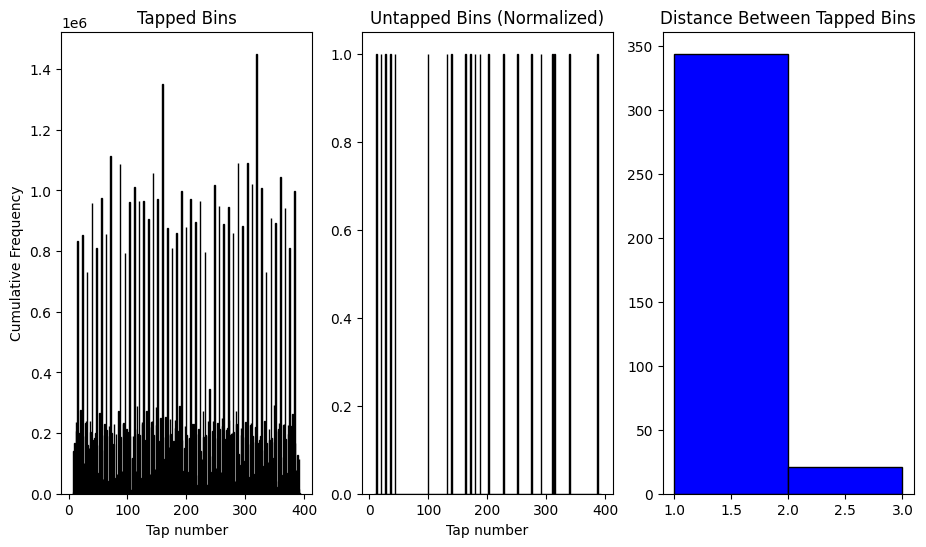

In [7]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch1_Z3_3_POR2.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps2, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps2)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps2)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps2) / len(full_range):.2f}% \n")

# Print Taps
bin2, freq2 = read_and_print.print_taps(data, present_taps2, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [8]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps2} \n")


# Feed to the TDL
TDL1_Z3_3.feed_physical_nums(present_taps2, 2)


# POR
error_lib2 = TDL1_Z3_3.next_POR_n_error_lib(error_lib1, 2)
to_print2 = TDL1_Z3_3.get_logical_assignments()

Present taps: 
 [  7   8   9  10  12  13  14  15  16  17  18  20  21  22  23  24  25  26
  28  29  30  31  32  33  34  36  37  38  39  40  41  42  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98 100 101 102
 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 132 133 134 135 136 137 138 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 164 165 166 167 168 169 170 172 173 174 175 176 177 178
 180 181 182 183 184 185 186 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 228 229 230 231 232 233 234 235 236
 237 238 239 240 241 242 243 244 245 246 247 248 249 250 252 253 254 255
 256 257 258 259 260 261 262 263 26

##3) Results

In [9]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_3.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_3.logical_assignment}")
print(f"{to_print2}")

POR result: 

((np.int64(8),), (np.int64(8),)):(8,)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 4, 8, 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, np.int64(4), 8, 6, 7, 5)
((np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 5, 7)
((np.int64(2), np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 1, np.int64(3), 8, 4, 6, 7, 5)
((np.int64(3), np.int64(4), np.int64(8)), (np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8))):(2, 3, 1, 8, np.int64(4), 6, 7, 5)
((np.in

# POR3

In [ ]:
!test -f "/content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch1_Z3_3_POR3.csv" && echo "File exists" || echo "File not found"

File exists


## 1) Data Loading


Data loaded from the csv file: /content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch1_Z3_3_POR3.csv'.

There are 383 tapped bins and 4 untapped = 387 = 387

Tapped is: 98.97% 



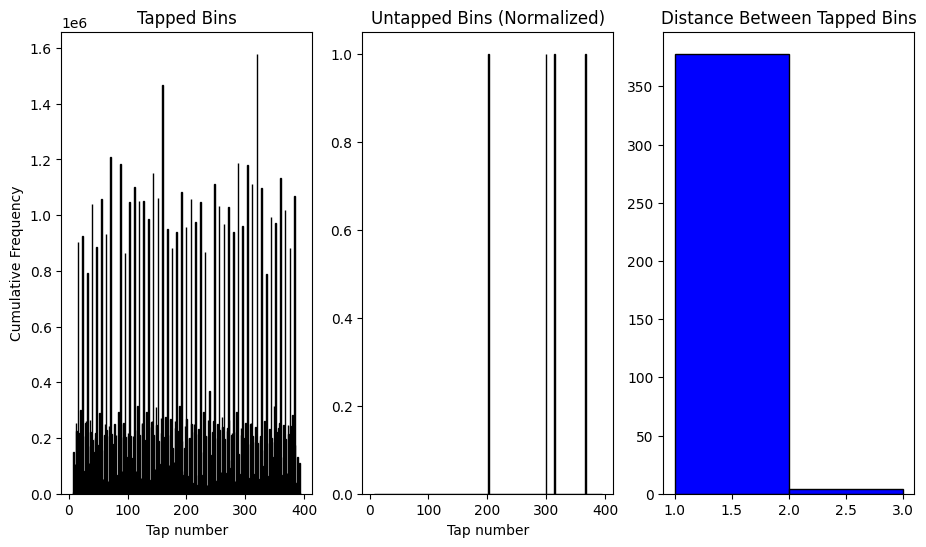

In [10]:
# Load the data
file_path = "/content/drive/My Drive/TTMU_SaveData/250422/Unsync1_Ch1_Z3_3_POR3.csv"
data, file_path = read_and_print.load_csv(file_path)
print(f"\nData loaded from the csv file: {file_path}'.\n")

# Identify the tapped / untapped bins
full_range, present_taps3, missing_taps = read_and_print.identify_sets(data)
print(f"There are {len(present_taps3)} tapped bins and {len(missing_taps)} untapped"
    f" = {len(present_taps3)+len(missing_taps)} = {len(full_range)}\n")
print(f"Tapped is: {100 * len(present_taps3) / len(full_range):.2f}% \n")

# Print Taps
bin3, freq3 = read_and_print.print_taps(data, present_taps3, missing_taps)

## 2) Carry out 'next_POR_n_error_lib'

In [ ]:
""" Present bins """

# Check raw 'present_taps'
print(f"Present taps: \n {present_taps3} \n")


# Feed to the TDL
TDL1_Z3_1.feed_physical_nums(present_taps3, 3)


# POR
error_lib3 = TDL1_Z3_1.next_POR_n_error_lib(error_lib2, 3)
to_print3 = TDL1_Z3_1.get_logical_assignments()

Present taps: 
 [ 15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32
  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68
  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 25

##3) Results

In [ ]:
# Show Results

print("POR result: \n")
for i,j in TDL1_Z3_1.POR_result.items():
  print(f"{i}:{j}")

print("\nLogical bin assignment: \n")
print(f"{TDL1_Z3_1.logical_assignment}")
print(f"{to_print3}")

POR result: 



NameError: name 'TDL1_Z3_1' is not defined

# Code Density Test

In [12]:
cdc_width, cdc_to_pass = ITI.get_bin_widths(bin3, freq3, to_print2)

# Save this into a .npz file
np.savez("/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/data/TDL1_Z3_3.npz", cdc_to_pass = cdc_to_pass)

In [13]:
print(cdc_to_pass)

{np.int64(41): np.float64(0.28501143840080484), np.int64(40): np.float64(6.964866418767578), np.int64(42): np.float64(0.7537142895776003), np.int64(43): np.float64(4.986803331115453), np.int64(47): np.float64(3.2304669087094613), np.int64(45): np.float64(11.756388393186272), np.int64(46): np.float64(10.310358921706571), np.int64(44): np.float64(2.962380467780255), np.int64(65): np.float64(41.612727818859476), np.int64(66): np.float64(10.02410570359997), np.int64(64): np.float64(1.2287640148062453), np.int64(67): np.float64(2.8469409469821234), np.int64(71): np.float64(2.1210057293416034), np.int64(69): np.float64(13.84423400519901), np.int64(70): np.float64(8.98473608984819), np.int64(68): np.float64(3.2435285915408034), np.int64(89): np.float64(42.56222937538435), np.int64(88): np.float64(9.578260797378023), np.int64(90): np.float64(1.3241970847887643), np.int64(91): np.float64(3.6962262820651093), np.int64(95): np.float64(1.3155966105300987), np.int64(93): np.float64(11.6530447265594

In [15]:
print(to_print2)

{0: np.int64(16), 1: np.int64(17), 2: np.int64(18), 3: np.int64(19), 4: np.int64(20), 5: np.int64(21), 6: np.int64(22), 7: np.int64(23), 8: np.int64(41), 9: np.int64(40), 10: np.int64(42), 11: np.int64(43), 12: np.int64(47), 13: np.int64(45), 14: np.int64(46), 15: np.int64(44), 16: np.int64(65), 17: np.int64(66), 18: np.int64(64), 19: np.int64(67), 20: np.int64(71), 21: np.int64(69), 22: np.int64(70), 23: np.int64(68), 24: np.int64(89), 25: np.int64(88), 26: np.int64(90), 27: np.int64(91), 28: np.int64(95), 29: np.int64(93), 30: np.int64(94), 31: np.int64(92), 32: np.int64(113), 33: np.int64(112), 34: np.int64(114), 35: np.int64(115), 36: np.int64(119), 37: np.int64(117), 38: np.int64(118), 39: np.int64(116), 40: np.int64(137), 41: np.int64(136), 42: np.int64(138), 43: np.int64(139), 44: np.int64(143), 45: np.int64(141), 46: np.int64(142), 47: np.int64(140), 48: np.int64(161), 49: np.int64(160), 50: np.int64(162), 51: np.int64(167), 52: np.int64(163), 53: np.int64(165), 54: np.int64(16

In [14]:
print(bin3)
print(present_taps3)
print(freq3)

[  7.   8.   9.  10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.
  21.  22.  23.  24.  25.  26.  27.  28.  29.  30.  31.  32.  33.  34.
  35.  36.  37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.
  49.  50.  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.
  63.  64.  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.
  77.  78.  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.
  91.  92.  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104.
 105. 106. 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118.
 119. 120. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132.
 133. 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146.
 147. 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160.
 161. 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174.
 175. 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188.
 189. 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202.
 203. 

# Endpoint - to print out

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print2, 3)

Type the ID for this txt file (e.g. '25_02_14'): 25_04_22_POR2
The text file has been created in this directory under the name: Bin_sequence_25_04_22_POR2.txt.


In [ ]:
files.download("Bin_sequence_25_04_22_POR2.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!cat "Bin_sequence_25_04_22_POR2.txt"

assign o_taps[0] = i_taps[16]; 
assign o_taps[1] = i_taps[17]; 
assign o_taps[2] = i_taps[18]; 
assign o_taps[3] = i_taps[19]; 
assign o_taps[4] = i_taps[20]; 
assign o_taps[5] = i_taps[21]; 
assign o_taps[6] = i_taps[22]; 
assign o_taps[7] = i_taps[23]; 
assign o_taps[8] = i_taps[41]; 
assign o_taps[9] = i_taps[40]; 
assign o_taps[10] = i_taps[42]; 
assign o_taps[11] = i_taps[43]; 
assign o_taps[12] = i_taps[47]; 
assign o_taps[13] = i_taps[45]; 
assign o_taps[14] = i_taps[46]; 
assign o_taps[15] = i_taps[44]; 
assign o_taps[16] = i_taps[65]; 
assign o_taps[17] = i_taps[66]; 
assign o_taps[18] = i_taps[64]; 
assign o_taps[19] = i_taps[67]; 
assign o_taps[20] = i_taps[71]; 
assign o_taps[21] = i_taps[69]; 
assign o_taps[22] = i_taps[70]; 
assign o_taps[23] = i_taps[68]; 
assign o_taps[24] = i_taps[89]; 
assign o_taps[25] = i_taps[88]; 
assign o_taps[26] = i_taps[90]; 
assign o_taps[27] = i_taps[91]; 
assign o_taps[28] = i_taps[95]; 
assign o_taps[29] = i_taps[93]; 
assign o_taps[30] = 

In [ ]:
final_outcome_of_notebook = to_print2
# 안찍힌 tap들 + Ultra-narrow bins crop anyways

In [ ]:
read_and_print.vivado_print_bin_assignment(to_print3, 1)

# Debug Prison

In [ ]:
r1,s,e = utils.split_into_cells(present_taps1, logical_assignment = TDL1_Z3_3.logical_assignment)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r1.items():
  print(f"{i}:{j}")

Starting Cell num: 3, Ending Cell num: 150
3:[np.int64(8)]
6:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
9:[np.int64(3), np.int64(4), np.int64(8)]
12:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
15:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
18:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
21:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
24:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
27:[np.int64(3), np.int64(4), np.int64(8)]
30:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
33:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
36:[np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
39:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
42:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
45:[np.int64(3), np.int64(4), np.int64(8)]
48:[np.int64(2), np.int64(3), np.int64(4), np.int64(8)]
51:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.int64(8)]
54:[np.int64(2), np.int64(3), np.int64(4), np.int64(6), np.i

In [ ]:
r2,s,e = utils.split_into_cells(present_taps2, logical_assignment = TDL1_Z3_3.logical_assignment)
print(f"Starting Cell num: {s}. Ending Cell num {e}")

for i,j in r2.items():
  print(f"{i}:{j}")

Starting Cell num: 3. Ending Cell num 150
3:[np.int64(8)]
6:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
9:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
12:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
15:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
18:[np.int64(1), np.int64(2), np.int64(3), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
21:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
24:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
27:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
30:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
33:[np.int64(1), np.int64(2), np.int6

In [ ]:
r3,s,e = utils.split_into_cells(present_taps3, logical_assignment = TDL1_Z3_3.logical_assignment)
print(f"Starting Cell num: {s}, Ending Cell num: {e}")

for i,j in r3.items():
  print(f"{i}:{j}")

Starting Cell num: 3, Ending Cell num: 150
3:[np.int64(8)]
6:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
9:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
12:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
15:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
18:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
21:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
24:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
27:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8)]
30:[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6

In [ ]:
# Code Density Test
code_density_test = freq3 / np.sum(freq3) * 4000  # time in ps

# As this snippet shows, whats not tapped can be omitted.
print(np.where(freq3 == 0))
print(bin3[np.where(freq3 == 0)])
print(freq2[np.where(freq3 == 0)] / np.sum(freq2) * 4000)

# for i in code_density_test:
#   print(i)

print(len(np.where(code_density_test < 0.5)[0]))


(array([194, 292, 306, 359]),)
[201. 299. 313. 366.]
[3.62296319e+00 4.99774208e-05 9.62465170e-01 4.99774208e-05]
38


# Reload (same thing)

In [ ]:
# Reload modules
importlib.reload(utils)
importlib.reload(Cell_Class)
importlib.reload(TDL_Class)
importlib.reload(UniqueHistory_Class)
importlib.reload(read_and_print)
importlib.reload(initialize)
importlib.reload(ITI)

# # Re-import all functions explicitly
# from utils import *
# from Cell_Class import *
# from TDL_Class import *
# from UniqueHistory_Class import *
# from read_and_print import *
# from initialize import *


<module 'initialize' from '/content/drive/MyDrive/TTMU_Colab_Notebooks/Calibrations/src_class/initialize.py'>